# 手寫數字辨識

In [51]:
import tensorflow as tf
import keras
from keras.datasets import mnist
import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## 建立隱藏層

In [52]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W)+b
    if activation is None:
        output = XWb
    else:
        output = activation(XWb)
    return output

## 建立輸入層

In [53]:
x = tf.placeholder('float', [None, 784])

## 建立隱藏層

In [54]:
h1 = layer(output_dim=256, input_dim=784, inputs=x, activation=tf.nn.relu)

## 建立輸出層

In [55]:
y_predict = layer(output_dim=10, input_dim=256, inputs=h1, activation=None)

# 定義訓練方式
設定y訓練label

In [56]:
y_label = tf.placeholder('float', [None, 10])

## 定義Loss Function

In [57]:
loss_fn = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))

## 定義optimizer 最優化方法

In [58]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_fn)

# 定義準確率評估
## 計算每筆資料是否預測正確
`tf.equal`判別兩個input param是否相等，回傳boolean<br>
`tf.reduce_mean`計算平均
`tf.cast`將型態轉為float

In [59]:
correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

# 進行訓練
<b>跟Keras不一樣，需要自己控制訓練的每個過程</b><br>
## 定義訓練參數

In [60]:
len(x_train)

60000

In [61]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
loss_list = [];epochList = [];accuracy_list = []
from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

## 進行訓練

In [62]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x:batch_x, y_label:batch_y})  #train
    loss, acc = sess.run([loss_fn, accuracy], feed_dict={x:mnist.validation.images,
                                                         y_label:mnist.validation.labels})  #validation
    epochList.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print('Tain Epoch:', '%02d' % (epoch+1),'Loss=','{:.9f}'.format(loss),'Accuracy=', acc)
duration = time() - startTime
print('Train Finished takes:', duration)

Tain Epoch: 01 Loss= 6.002699375 Accuracy= 0.8508
Tain Epoch: 02 Loss= 4.012182713 Accuracy= 0.8906
Tain Epoch: 03 Loss= 3.159824133 Accuracy= 0.9074
Tain Epoch: 04 Loss= 2.544422626 Accuracy= 0.9166
Tain Epoch: 05 Loss= 2.207300663 Accuracy= 0.9252
Tain Epoch: 06 Loss= 1.991951942 Accuracy= 0.928
Tain Epoch: 07 Loss= 1.730795264 Accuracy= 0.9318
Tain Epoch: 08 Loss= 1.669277906 Accuracy= 0.9336
Tain Epoch: 09 Loss= 1.507706881 Accuracy= 0.9374
Tain Epoch: 10 Loss= 1.463947058 Accuracy= 0.9394
Tain Epoch: 11 Loss= 1.388342738 Accuracy= 0.9416
Tain Epoch: 12 Loss= 1.350099921 Accuracy= 0.9422
Tain Epoch: 13 Loss= 1.305345893 Accuracy= 0.9442
Tain Epoch: 14 Loss= 1.233740330 Accuracy= 0.9464
Tain Epoch: 15 Loss= 1.215384364 Accuracy= 0.9474
Train Finished takes: 72.08579611778259


## 畫出loss & acc 誤差值行結果

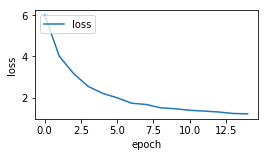

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epochList, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

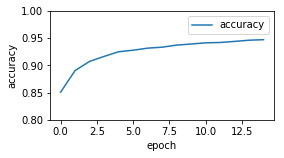

In [64]:
plt.plot(epochList, accuracy_list, label='accuracy')
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8, 1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

## 評估模型準確率

In [65]:
print('Accuracy:', sess.run(accuracy, feed_dict={x:mnist.test.images, y_label:mnist.test.labels}))  #test

Accuracy: 0.9394


## 進行預測

In [66]:
prediction_result = sess.run(tf.argmax(y_predict, 1), feed_dict={x:mnist.test.images})

In [67]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 隱藏層加入更多神經元
更改output_dim, 增加layer